#Chennai House Price Prediction

##Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

##Data
The historical sale data is available here. [https://drive.google.com/file/d/1hqlG0IqJh87-GiMNL_KAtbtZppMO07Hb/view?usp=sharing]

##Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


In [1]:
# To Manipulate The Dataset
import pandas as pd
import numpy as np
# To Visualise The Dataset
import seaborn as sns
import matplotlib.pyplot as plt
# To Suppress Waring
import warnings                         
warnings.filterwarnings('ignore')       
# To Split Train And Test Data
from sklearn.model_selection import train_test_split
# Importing Require LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# We Import Metrics to Known R2 Score 
from sklearn import metrics

##Reading The Dataset

In [2]:
df = pd.read_csv("train-chennai-sale.csv")

##An Overview Of A Given Dataset

In [3]:
df.shape

(7109, 22)

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

#Data Cleaning Process

##1.Checking Null Values In A Given Dataset

In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

##Impute Missing Data Values By MODE & MEAN 

In [7]:
df['N_BEDROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0], inplace = True)
df['QS_OVERALL'].fillna(df['QS_OVERALL'].median(), inplace = True)

In [8]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

##2.Checking Duplicates in a Given Dataset

In [9]:
df.duplicated().sum()

0

##3.Is The Given Data Set in The Correct Format or Not? If Not, Rectify it.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

###The 'DATE_SALE' & 'DATE_BUILD' Formats Should Be in Data Time Format, Not in Object Format.
###The Data Types 'N_BEDROOM' and 'N_BATHROOM' are Not Floats But Rather Integers.

In [11]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

#Structure Data
##4.Checking for Spelling Mistakes in a Given Data Set

In [13]:
key = ['AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in key:
  print(df[i].unique())
  print("...................................................................................")

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
...................................................................................
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
...................................................................................
['Yes' 'No' 'Noo']
...................................................................................
['Commercial' 'Others' 'Other' 'House' 'Comercial']
...................................................................................
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
...................................................................................
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
...................................................................................
['A' 'RH' 'RL' 'I' 'C' 'RM']
.............

In [14]:
df['AREA'] = df['AREA'].replace({'TNagar':'T Nagar', 'Chrompt':'Chrompet','Chrmpet':'Chrompet', 'Karapakam':'Karapakkam', 
                             'Ana Nagar':'Anna Nagar','Chormpet':'Chrompet', 'Adyr':'Adyar', 'Velchery':'Velachery', 'Ann Nagar':'Anna Nagar', 'KKNagar':'KK Nagar'})

df['SALE_COND'] = df['SALE_COND'].replace({'Adj Land':'AdjLand', 'Ab Normal':'AbNormal','Partiall':'Partial', 'PartiaLl':'Partial'})

df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo':'No'})

df['BUILDTYPE'] = df['BUILDTYPE'].replace({'Others':'Other','Comercial':'Commercial'})

df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'NoSewr ':'NoSeWa' , 'AllPub':'All Pub'})

df['STREET'] = df['STREET'].replace({'Pavd':'Paved', 'NoAccess':'No Access'})

In [15]:
key = ['AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in key:
  print(df[i].unique())
  print("...................................................................................")

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
...................................................................................
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
...................................................................................
['Yes' 'No']
...................................................................................
['Commercial' 'Other' 'House']
...................................................................................
['All Pub' 'ELO' 'NoSeWa']
...................................................................................
['Paved' 'Gravel' 'No Access']
...................................................................................
['A' 'RH' 'RL' 'I' 'C' 'RM']
...................................................................................


##Adding A New Feature to A Given Data Set By Determining The Age of The Building From 'DATE_SALE' & 'DATE_BUILD'. 

In [16]:
df['AGE'] = df['DATE_SALE'].dt.year - df['DATE_BUILD'].dt.year

In [17]:
df['AGE']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE, Length: 7109, dtype: int64

##Dropping Unnecessary Features

In [18]:
df = df.drop(['PRT_ID','DATE_SALE', 'DATE_BUILD', 'REG_FEE', 'COMMIS'], axis=1)

##5.Finding The Outliers in a Given Dataset

In [19]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503232,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


##Boxplot Method

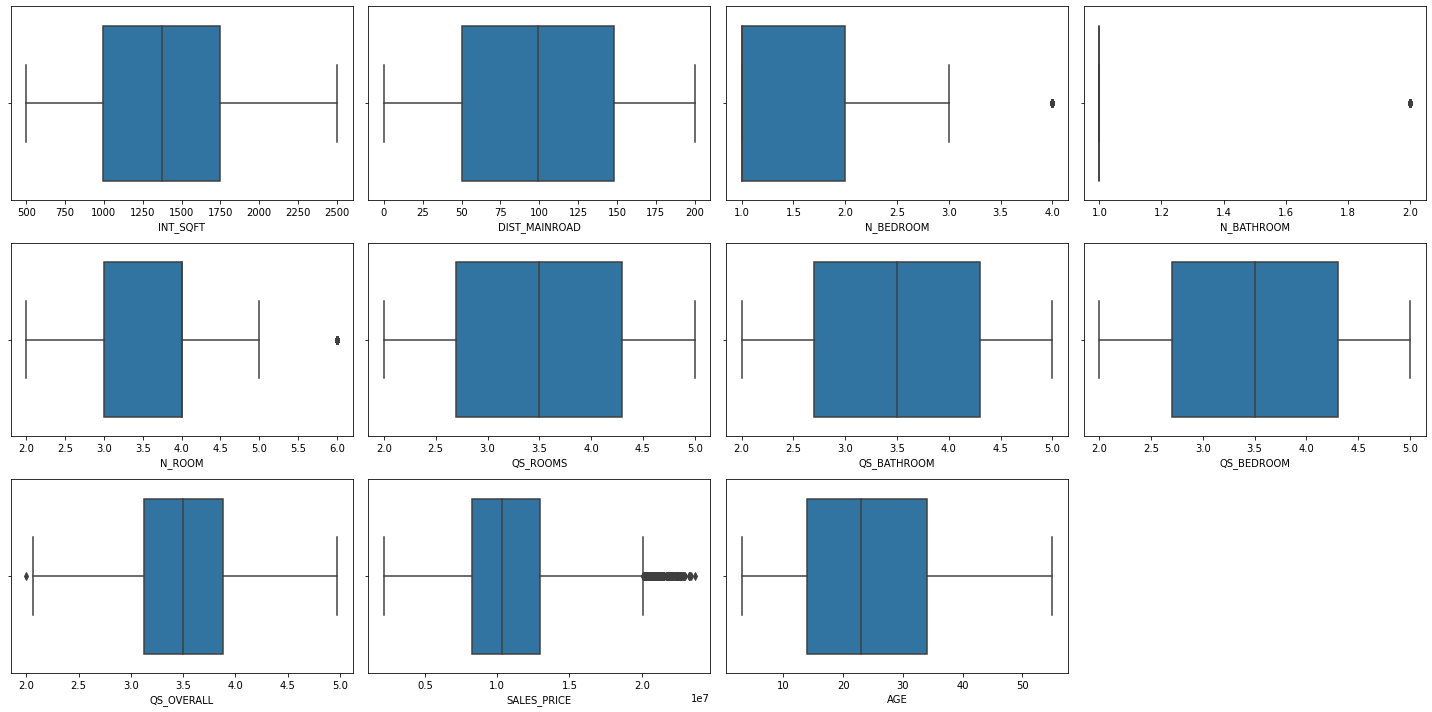

In [20]:
feature = df.describe().keys()                   # Here We Getting All Our Numerical Features
col = 4
row = round(len(feature)/col)
i = 1
plt.figure(figsize = (20, 10))
for k in feature:
  plt.subplot(row, col, i)
  sns.boxplot(df[k])
  i+=1
plt.tight_layout()
plt.show()

## IQR Method
###Finding of Interquartile Range(IQR) And Lower Limit And Upper Limit Method

In [21]:
def outlier_presence(df, feature):
  for i in feature:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")

feature = df.describe().keys() 
outlier_presence(df, feature )

Interquartile Range of INT_SQFT is 751.0
Lower Limit  -133.5
Upper Limit  2870.5
Outlier is Not Presented In INT_SQFT


Interquartile Range of DIST_MAINROAD is 98.0
Lower Limit  -97.0
Upper Limit  295.0
Outlier is Not Presented In DIST_MAINROAD


Interquartile Range of N_BEDROOM is 1.0
Lower Limit  -0.5
Upper Limit  3.5
Outlier is Presented In N_BEDROOM


Interquartile Range of N_BATHROOM is 0.0
Lower Limit  1.0
Upper Limit  1.0
Outlier is Presented In N_BATHROOM


Interquartile Range of N_ROOM is 1.0
Lower Limit  1.5
Upper Limit  5.5
Outlier is Presented In N_ROOM


Interquartile Range of QS_ROOMS is 1.5999999999999996
Lower Limit  0.3000000000000007
Upper Limit  6.699999999999999
Outlier is Not Presented In QS_ROOMS


Interquartile Range of QS_BATHROOM is 1.5999999999999996
Lower Limit  0.3000000000000007
Upper Limit  6.699999999999999
Outlier is Not Presented In QS_BATHROOM


Interquartile Range of QS_BEDROOM is 1.5999999999999996
Lower Limit  0.3000000000000007
Upper Limit  6.69999

In [22]:
def Outlier_Data_Points(df_ODP, feature):
  for i in feature:
    data =[]
    Q1 = df_ODP[i].quantile(0.25)
    Q3 = df_ODP[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df_ODP[(df_ODP[i]<lower_limit)|(df_ODP[i]>upper_limit)] # Here We Find The All outliers In Given Data set
    if outliers.shape[0] != 0:
      print("Outlier is Presented In " + i + " is")
      for j in outliers[i]:
        data.append(j)
      print(data)
      print('\n')
    else:
      print("No Outlier is Presented In",i )

feature = df.describe().keys()  
Outlier_Data_Points(df, feature)

No Outlier is Presented In INT_SQFT
No Outlier is Presented In DIST_MAINROAD
Outlier is Presented In N_BEDROOM is
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


Outlier is Presented In N_BATHROOM is
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

##From Our General Knowledge, 'N_BEDROOM', 'N_BATHROOM', and 'N_ROOM' are Counts of Room Numbers That are Not Going to be Outliers in a Given Dataset.

##QS_OVERALL Having Only One Outlier, We Don't Consider It

##Outliers in 'SALES_PRICE' are Above the Upper Limit Value(20076600.0). In General, the Sale Price of a House Can Be Above The Upper Limit Value(20076600.0), So There Is No Need To Do Anything in 'SALES_PRICE'.


##Exploratory Data Analysis

###Exploratory Data Analysis For Numerical Features

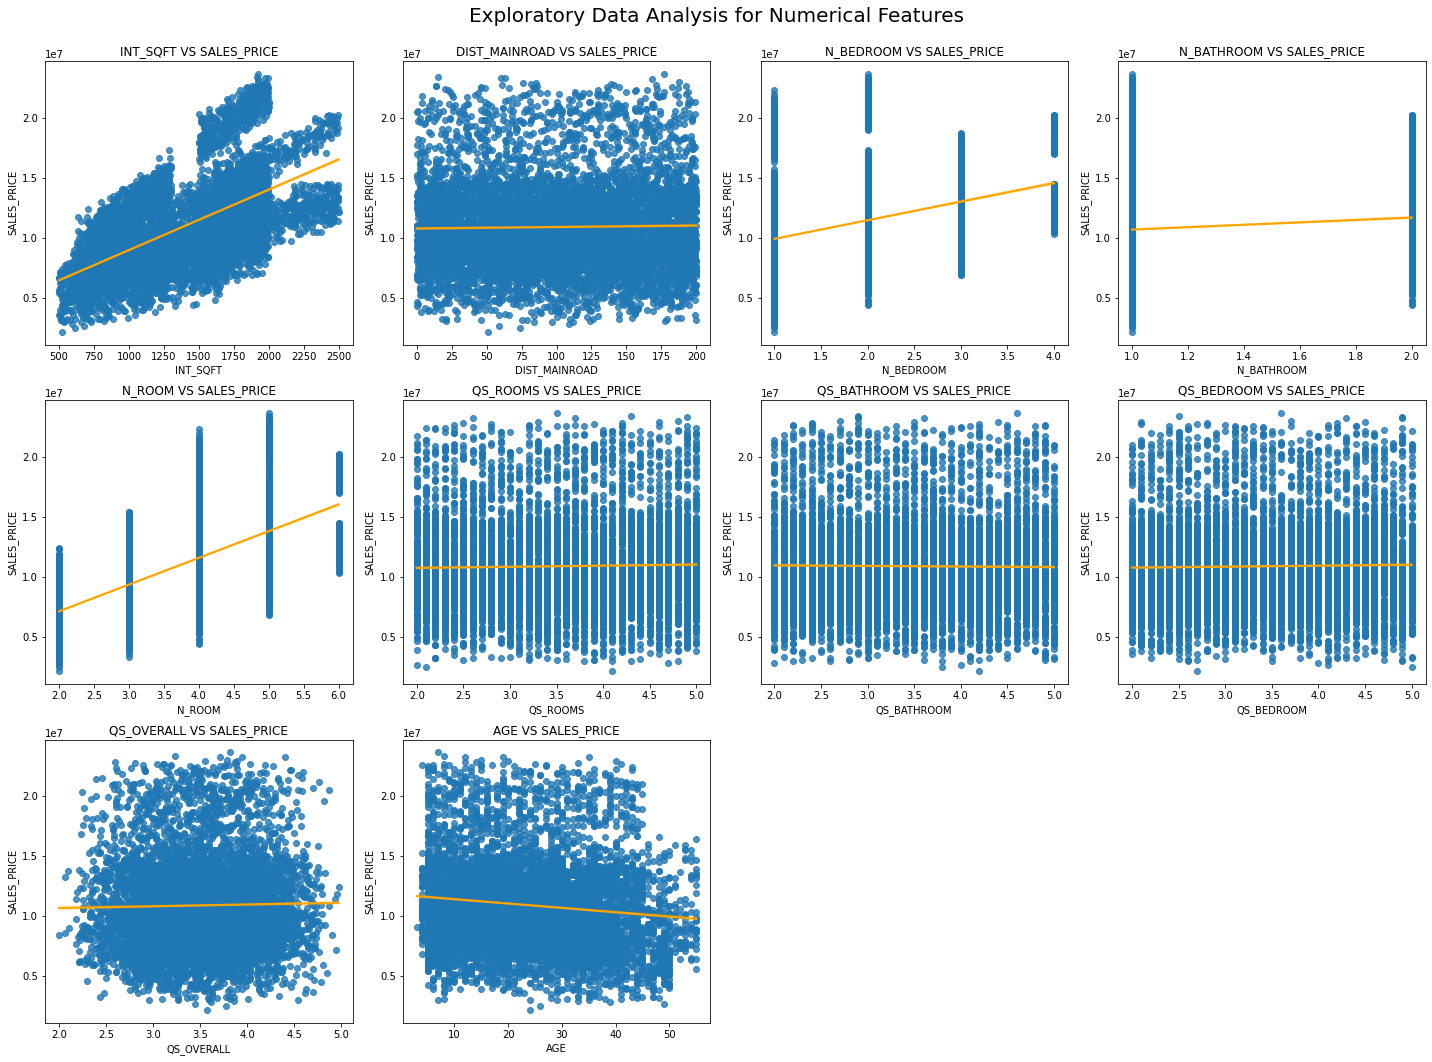

In [23]:
feature = df.describe().keys()                            # Here We Getting All Our Features
i = 1
col = 4
row = round(len(feature)/col)

plt.figure(figsize = (20, 15))
for k in feature:
  if k != feature[-2]:
    plt.subplot(row, col, i)
    #df.plot(x= k, y=feature[-2], style='o')
    #df.groupby(k)[feature[-2]].mean().plot()
    # plt.xlabel(k)
    # plt.ylabel(feature[-2])
    sns.regplot(x= k, y=feature[-2], data=df, line_kws = {'color': 'orange'})
    plt.title(k +' VS '+feature[-2])
    i+=1
plt.suptitle("Exploratory Data Analysis for Numerical Features", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

### From the Above Graphs 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM' and 'AGE' are Having Very Good Linear Relationship Between "SALES_PRICE'. These are The Very Important Features In Our Given Data Set. We Should Keep This.

### And We Can Understand That 'DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', and 'QS_OVERALL' are Not Having Good Linear Relationship Between "SALES_PRICE', As a Result, We Can Ignore This Feature When Developing Models.

###Exploratory Data Analysis of Categorical Features

In [24]:
New_df = df.drop(df.describe().keys(), axis = 1 )
New_df['SALES_PRICE'] = df['SALES_PRICE']
New_df 

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,AbNormal,Yes,Commercial,All Pub,Paved,A,7600000
1,Anna Nagar,AbNormal,No,Commercial,All Pub,Gravel,RH,21717770
2,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200
3,Velachery,Family,No,Other,NoSeWa,Paved,I,9630290
4,Karapakkam,AbNormal,Yes,Other,All Pub,Gravel,C,7406250
...,...,...,...,...,...,...,...,...
7104,Karapakkam,AdjLand,No,Other,ELO,No Access,RM,5353000
7105,Velachery,Family,Yes,Other,NoSeWa,No Access,RH,10818480
7106,Velachery,Normal Sale,No,House,NoSeWa,Gravel,I,8351410
7107,Karapakkam,Partial,Yes,Commercial,ELO,Paved,RL,8507000


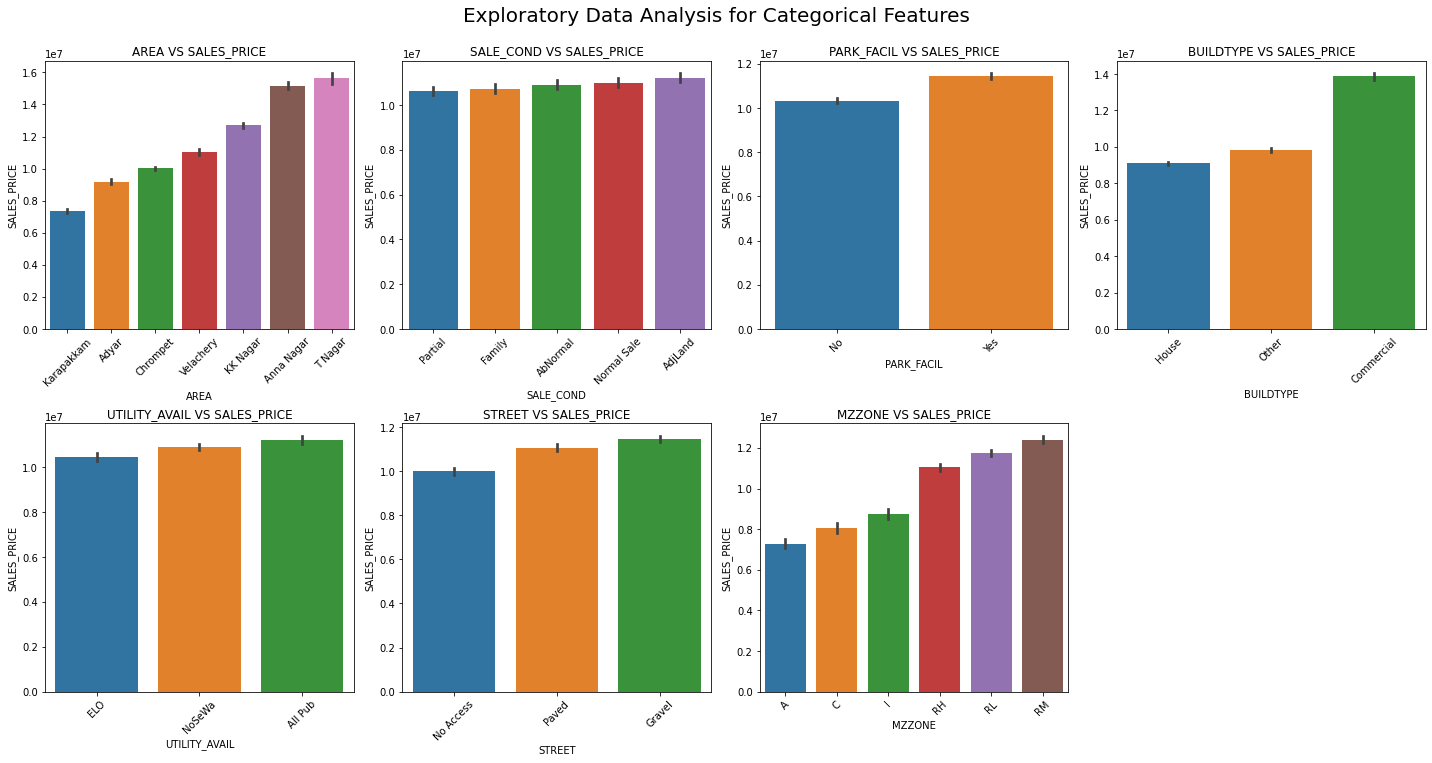

In [25]:
Cat_feature = New_df.keys()
i = 1
col = 4
row = round(len(feature)/col)
plt.figure(figsize = (20, 15))
for k in Cat_feature:
  if k != Cat_feature[-1]:
    plt.subplot(row, col, i)
    sort = New_df.groupby(k)[Cat_feature[-1]].mean().reset_index().sort_values([Cat_feature[-1]])[k]
    sns.barplot(x = k, y = Cat_feature[-1], data = New_df, order = sort)   
    plt.title(k +' VS '+ Cat_feature[-1]) 
    plt.xticks(rotation = 45)
    i+=1
plt.suptitle("Exploratory Data Analysis for Categorical Features", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()
                                   

###By Checking The Relationship Between Categorical Features and 'SALES_Price'. We Know That 'AREA,' 'PARK_FACIL,' 'BUILDTYPE,' 'UTILITY_AVAIL,' 'STREET,' And 'MZZONE' Have a Strong Linear Relationship With 'SALES_PRICE'. 

###There is No Good Linear Relationsip Between'SALE_COND' And 'SALES_PRICE'. 

###From Above Overall Conclusion We Can Drop Following Feature For Developing Models 'DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL' And 'SALE_COND'.

In [26]:
df = df.drop(['DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL', 'SALE_COND'], axis=1)

In [27]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Yes,Commercial,All Pub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,All Pub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3,2,5,No,Other,NoSeWa,Paved,I,9630290,22
4,Karapakkam,1226,1,1,3,Yes,Other,All Pub,Gravel,C,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,No,Other,ELO,No Access,RM,5353000,49
7105,Velachery,1897,3,2,5,Yes,Other,NoSeWa,No Access,RH,10818480,9
7106,Velachery,1614,2,1,4,No,House,NoSeWa,Gravel,I,8351410,28
7107,Karapakkam,787,1,1,2,Yes,Commercial,ELO,Paved,RL,8507000,32


###From Exploratory Data Analysis For Categorical Features, We can Encode 'AREA', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET' And 'MZZONE' by Label Encoding Technique.

###For The'BUILDTYPE' Feature, We Need To Follow One Hot Encoding Technique.

In [28]:
df ['AREA']          = df ['AREA'].map({'Karapakkam':0, 'Adyar': 1, "Chrompet": 2, 'Velachery':3, 'KK Nagar': 4, 'Anna Nagar':5, 'T Nagar':6 })
df ['PARK_FACIL']    = df ['PARK_FACIL'].map({'No': 0, 'Yes':1})
df ['UTILITY_AVAIL'] = df ['UTILITY_AVAIL'].map({'ELO':0, 'NoSeWa': 1, 'All Pub': 2})
df ['STREET']        = df ['STREET'].map({'No Access':0, 'Paved': 1, 'Gravel':2})
df ['MZZONE']        = df ['MZZONE'].map({'A':0, 'C': 1, 'I': 2, 'RH':4, 'RL':5, 'RM':6})

In [29]:
df = pd.get_dummies(df, columns=['BUILDTYPE'])

In [30]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,0,0,0,6,5353000,49,0,0,1
7105,3,1897,3,2,5,1,1,0,4,10818480,9,0,0,1
7106,3,1614,2,1,4,0,1,2,2,8351410,28,0,1,0
7107,0,787,1,1,2,1,0,1,5,8507000,32,1,0,0


###X is Going to Have Our Feature Data And Y is Going to Have Our Target Data
###Here We Going To Split Train Data Into 70%, Test Data Into 30%

In [31]:
X = df.drop('SALES_PRICE', axis= 1)
y = df['SALES_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

###Now We Can Develop Our Model With X_train And Y_Train

In [32]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

###Now We Can Know That Our Model Intercept and Coefficient

In [33]:
print(regressor.intercept_) 

803706.9697886221


In [34]:
df_coef = pd.DataFrame(regressor.coef_, df.drop('SALES_PRICE', axis= 1).keys(), columns= ['Cofficient'])
df_coef

,Cofficient
AREA,5.696908e+05
INT_SQFT,1.433294e+03
N_BEDROOM,-1.537787e+06
N_BATHROOM,2.353260e+05
N_ROOM,1.718354e+06
PARK_FACIL,1.042332e+06
UTILITY_AVAIL,3.583715e+04
STREET,5.093139e+05
MZZONE,4.623675e+05
AGE,-1.694005e+04


In [35]:
y_pred = regressor.predict(X_test)
y_pred

array([14363861.55653214,  7040466.4880099 ,  8884545.71234984, ...,
       11876021.92212762,  4138380.82185375,  8658702.90801175])

###"regressor.predict(X_test)" Predicts The "SALES_Price"

In [36]:
Fdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Fdf

,Actual,Predicted
405,14761860,1.436386e+07
759,5198500,7.040466e+06
6009,10621695,8.884546e+06
1838,9797510,9.203417e+06
1518,11216030,1.229067e+07
...,...,...
4839,9824900,9.673184e+06
3575,10584775,9.970583e+06
6483,11265840,1.187602e+07
1131,5308500,4.138381e+06


###We Can Determine How Strong Our Model Is In Linear Relationships By Knowing R2 Score 

In [37]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9190513981988457


###Our Model $R^2$ Score is 0.92, Which is Greater Than 0.8. That Means This Linear equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [38]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip([df.drop('SALES_PRICE', axis= 1).keys()],selector.support_))

[(Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
         'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE', 'BUILDTYPE_Commercial',
         'BUILDTYPE_House', 'BUILDTYPE_Other'],
        dtype='object'), False)]

##K Nearest Neighbor Algorithm(KNN)

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)   


for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train_Scaled,y_train) # training the model
  print("K value  : " , i, " score : ", knn.score(X_test_Scaled,y_test)) #predicting using the model

K value  :  1  score :  0.9358000578622534
K value  :  2  score :  0.9469456807498957
K value  :  3  score :  0.9514759004254052
K value  :  4  score :  0.9500701312875846
K value  :  5  score :  0.9508643376250269
K value  :  6  score :  0.9511364978383883
K value  :  7  score :  0.9502651405529893
K value  :  8  score :  0.9489029175333306
K value  :  9  score :  0.9488975204092591
K value  :  10  score :  0.9484395195646143
K value  :  20  score :  0.9387101410293786
K value  :  50  score :  0.9161855716502211


##DecisionTree Algorithm

In [40]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.predict(X_test)

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9190513981988457


## Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
dict = {}
for i in range(3,10):
    rf = RandomForestRegressor(max_depth = i)
    rf.fit(X_train, y_train)
    dict[i] = {'tr': rf.score(X_train, y_train), 'te':rf.score(X_test, y_test)}
    print("For max depth = ", i)
    print("Training score: ", rf.score(X_train, y_train))
    print("Testing score: ", rf.score(X_test, y_test))

for max depth =  3
Training score:  0.8195070336658052
Testing score:  0.8196026664553894
for max depth =  4
Training score:  0.8966257265913592
Testing score:  0.8912493177709422
for max depth =  5
Training score:  0.9333697516847158
Testing score:  0.9246473357793179
for max depth =  6
Training score:  0.9569670243003229
Testing score:  0.9486642883866246
for max depth =  7
Training score:  0.9726795060410606
Testing score:  0.9639292050169578
for max depth =  8
Training score:  0.983335580775047
Testing score:  0.9744823926434761
for max depth =  9
Training score:  0.9900941667766148
Testing score:  0.9811173681406644


##XGBoost Algorithm

In [42]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(objective = 'reg:squarederror')
xg_reg.fit(X_train_Scaled, y_train)
print('R2 Training Score: ', xg_reg.score(X_train_Scaled, y_train))
print('R2 Validation Score:', xg_reg.score(X_test_Scaled, y_test))

R2 Training Score:  0.9908755349453191
R2 Validation Score: 0.9893926508453458


##Finding Most Important Features

In [45]:
key = df.keys()
key


Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],
      dtype='object')

In [49]:
key = df.drop('SALES_PRICE', axis= 1).keys()
importance = xg_reg.feature_importances_
importance = pd.Series(importance)
importance.index = key
importance.sort_values(ascending=False)

N_ROOM                  0.342340
BUILDTYPE_Commercial    0.275927
AREA                    0.205457
INT_SQFT                0.068442
MZZONE                  0.047731
BUILDTYPE_House         0.023929
PARK_FACIL              0.019944
STREET                  0.011352
AGE                     0.002684
UTILITY_AVAIL           0.001475
N_BATHROOM              0.000551
BUILDTYPE_Other         0.000168
N_BEDROOM               0.000000
dtype: float32

#Conclusion
##For this dataset, the XGBoost Algorithm is the best algorithm for developing Machine Learning model.
##Here we can observe that 'N_ROOM', 'BUILDTYPE_Commercial', 'AREA', 'INT_SQFT' , 'MZZONE', 'BUILDTYPE_House', 'PARK_FACIL', and 'STREET' are the top most important features in this dataset.